# Airbnb NYC pricing predictor




## 1) Problem Statement
This project understands the pattern and factors influencing AirBnb pricing such as neighbourhood, room type and predicting pricing accuraely.

## 2) Data Collection


#### 2.1 Import Data and Required Packages


In [1]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# plot settings
mpl.style.use("ggplot")
mpl.rcParams["figure.figsize"] = (20, 5)
mpl.rcParams["axes.facecolor"] = "white"
mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "lightgray"
mpl.rcParams["axes.linewidth"] = 1
mpl.rcParams["xtick.color"] = "black"
mpl.rcParams["ytick.color"] = "black"
mpl.rcParams["font.size"] = 12
mpl.rcParams["figure.titlesize"] = 25
mpl.rcParams["figure.dpi"] = 100

In [3]:
df = pd.read_csv("../data/Airbnb_Open_Data.csv")
df.head(3)

/var/folders/8g/yph8vgw54r91qbfq45ff7lq00000gn/T/ipykernel_86554/1560045422.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/Airbnb_Open_Data.csv")


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN


In [4]:
df.shape

(102599, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [6]:
df.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [7]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [8]:
# Convert 'last review' column to datetime type
df['last review'] = pd.to_datetime(df['last review'])

In [9]:
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].astype(float)

In [10]:
df['price']

0          966.0
1          142.0
2          620.0
3          368.0
4          204.0
           ...  
102053     696.0
102054     909.0
102055     387.0
102056     848.0
102057    1128.0
Name: price, Length: 102058, dtype: float64

In [11]:
df['service fee'] = df['service fee'].str.replace('$', '')
df['service fee'] = df['service fee'].str.replace(',', '')
df['service fee'] = df['service fee'].astype(float)

In [12]:
df['service fee']

0         193.0
1          28.0
2         124.0
3          74.0
4          41.0
          ...  
102053      NaN
102054      NaN
102055      NaN
102056      NaN
102057      NaN
Name: service fee, Length: 102058, dtype: float64

In [13]:
df.shape

(102058, 26)

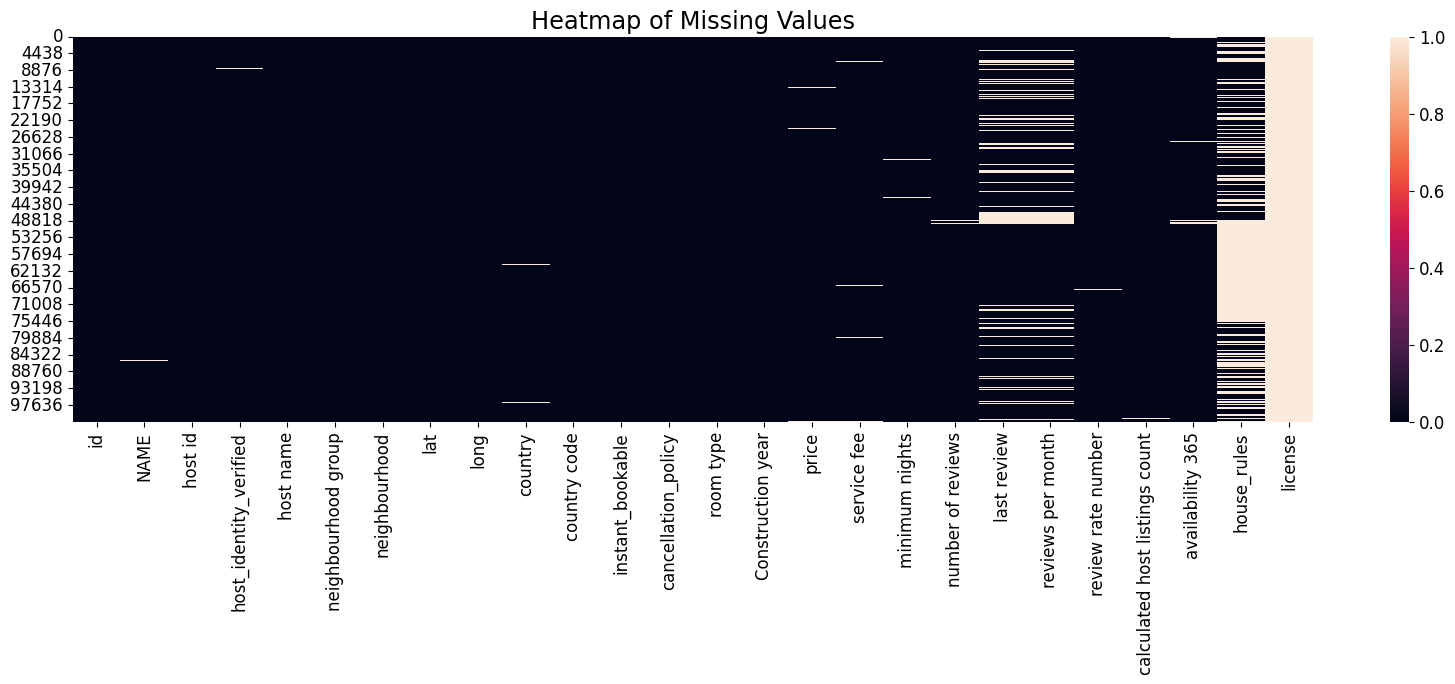

In [14]:
# Plot heatmap of missing values
sns.heatmap(df.isnull())
plt.title('Heatmap of Missing Values')
plt.savefig("../visualizations/1_missing_values.png", bbox_inches='tight')

**Drop NA**

In [15]:
df = df.dropna(subset=['price', 'NAME', 'host_identity_verified'])
df = df.dropna(subset=['neighbourhood group', 'neighbourhood'])
df = df.dropna(subset=['cancellation_policy'])
df = df.dropna(
    subset=['instant_bookable', 'host name', 'Construction year'])
df = df.dropna(subset=['lat', 'long'])

In [16]:
df.shape

(100595, 26)

In [17]:
# Drop columns where value counts is equal to 1
for col in df.columns:
    if df[col].value_counts().shape[0] == 1:
        df = df.drop(col, axis=1)

In [18]:
# Fill null values in service fee by zeros
df['service fee'] = df['service fee'].fillna(0)

In [19]:
df['service fee']

0         193.0
1          28.0
4          41.0
5         115.0
7         212.0
          ...  
102037      0.0
102038      0.0
102039      0.0
102040    196.0
102057      0.0
Name: service fee, Length: 100595, dtype: float64

In [20]:
df['availability 365'].describe()

count    100206.000000
mean        141.069108
std         135.416654
min         -10.000000
25%           3.000000
50%          96.000000
75%         268.000000
max        3677.000000
Name: availability 365, dtype: float64

In [21]:
# remove availability 365 that less than 0
df['availability 365'] = np.where(df['availability 365'] < 0, df['availability 365']*-1, df['availability 365'])

# remove availability 365 that more than 365
df['availability 365'] = np.where(df['availability 365'] > 365, 365, df['availability 365'])

In [22]:
# remove minimum nights that less than 0
df['minimum nights'] = np.where(df['minimum nights'] < 0, df['minimum nights']*-1, df['minimum nights'])

In [23]:
df['availability 365'].describe()

count    100206.000000
mean        140.259785
std         133.409581
min           0.000000
25%           4.000000
50%          96.000000
75%         268.000000
max         365.000000
Name: availability 365, dtype: float64

In [24]:
# rename neighbourhood group for use in delete value
df.rename(columns = {'neighbourhood group': 'neighbourhood_group'}, inplace = True)

In [25]:
# remove the row that neighbourhood group is brookln (out lier)
df = df[df.neighbourhood_group != 'brookln']

In [26]:
df.isnull().sum().sort_values()

id                                    0
service fee                           0
price                                 0
Construction year                     0
cancellation_policy                   0
instant_bookable                      0
long                                  0
room type                             0
neighbourhood                         0
neighbourhood_group                   0
host name                             0
host_identity_verified                0
host id                               0
NAME                                  0
lat                                   0
number of reviews                   181
review rate number                  279
calculated host listings count      310
minimum nights                      374
availability 365                    389
reviews per month                 15605
last review                       15611
house_rules                       51235
dtype: int64

In [27]:
df.head(3)

,id,NAME,host id,host_identity_verified,host name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,...,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,...,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,...,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th..."


# EDA

In [28]:
# summary stats
df.describe().T

,count,mean,min,25%,50%,75%,max,std
id,100594.0,29287436.988468,1001254.0,15198898.0,29313615.0,43320633.0,57367417.0,16226860.567956
host id,100594.0,49254626844.809708,123600518.0,24563802582.5,49115320723.0,73998556508.0,98763129024.0,28543290563.918865
lat,100594.0,40.728079,40.49979,40.68875,40.7223,40.76275,40.91697,0.055858
long,100594.0,-73.949631,-74.24984,-73.98256,-73.95443,-73.932282,-73.70522,0.049513
Construction year,100594.0,2012.488647,2003.0,2007.0,2012.0,2017.0,2022.0,5.76433
price,100594.0,625.371275,50.0,340.0,625.0,913.0,1200.0,331.651913
service fee,100594.0,124.770642,0.0,68.0,125.0,182.0,240.0,66.521027
minimum nights,100220.0,8.129126,1.0,2.0,3.0,5.0,5645.0,30.335731
number of reviews,100413.0,27.378766,0.0,1.0,7.0,30.0,1024.0,49.37422
last review,84983,2019-06-11 15:45:50.738382592,2012-07-11 00:00:00,2018-10-27 00:00:00,2019-06-14 00:00:00,2019-07-05 00:00:00,2024-08-15 00:00:00,NaN


/var/folders/8g/yph8vgw54r91qbfq45ff7lq00000gn/T/ipykernel_86554/2309755606.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres")


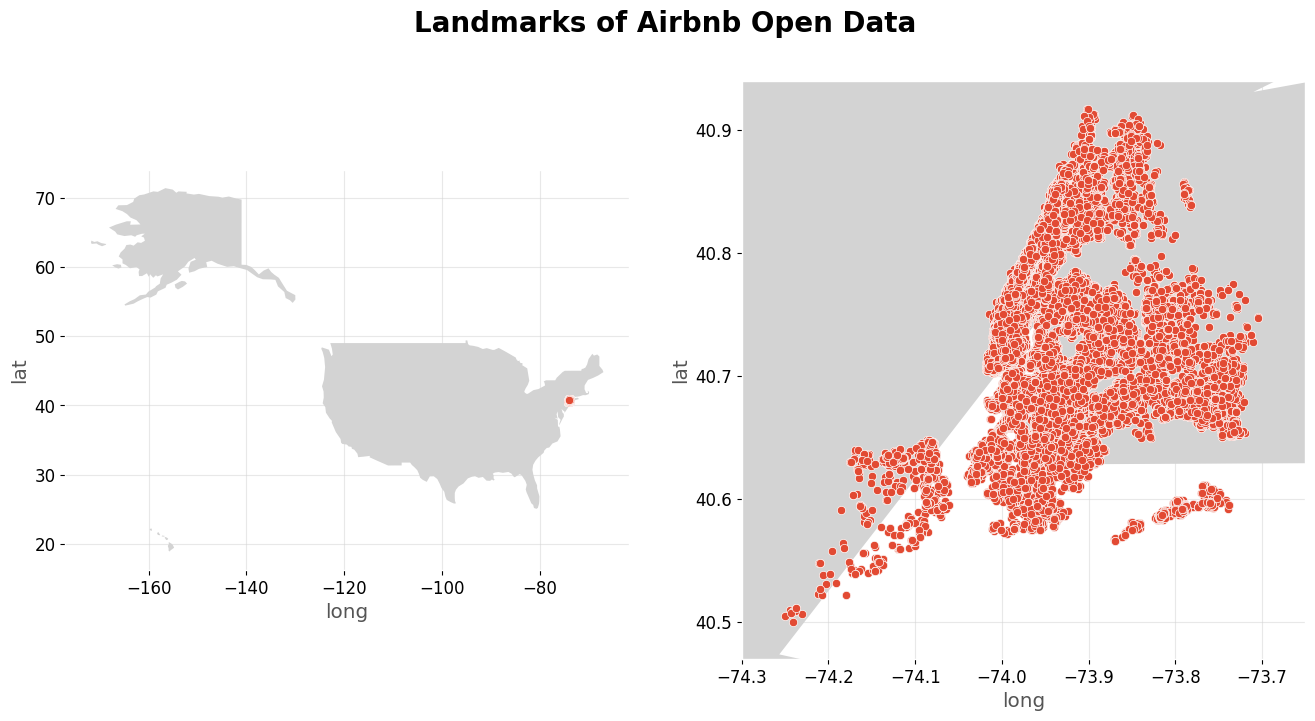

In [29]:
# visualize the land marks on the world map
import geopandas as gpd

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 16))

countries = gpd.read_file(
    gpd.datasets.get_path("naturalearth_lowres")
)

countries[countries["name"] == "United States of America"].plot(
    color="lightgrey", ax=ax[0])
countries[countries["name"] == "United States of America"].plot(
    color="lightgrey", ax=ax[1])

sns.scatterplot(x="long", y="lat", data=df, ax=ax[0])
sns.scatterplot(x="long", y="lat", data=df, ax=ax[1])
ax[0].grid(visible=True, alpha=0.5)
ax[1].grid(visible=True, alpha=0.5)
ax[1].set_xlim([-74.3, -73.65])
ax[1].set_ylim([40.47, 40.94])

plt.suptitle("Landmarks of Airbnb Open Data", x=0.5,
             y=0.72, fontweight="bold", fontsize=20)

plt.savefig("../visualizations/2_airbnb_opendata_landmarks.png", bbox_inches='tight')

In [30]:
# make groups every 3 months
df['availability_grp'] = np.where(df['availability 365'] <= 90, '0-3 Months',
                                      np.where((df['availability 365'] > 9) & (df['availability 365'] <= 180), '3-6 Months',
                                               np.where((df['availability 365'] > 180) & (df['availability 365'] <= 270), '6-9 Months', '9-12 Months')))

In [31]:
df['availability_grp'].value_counts()

availability_grp
0-3 Months     49186
9-12 Months    25041
3-6 Months     14666
6-9 Months     11701
Name: count, dtype: int64

> What is the most available set of dates of the year?

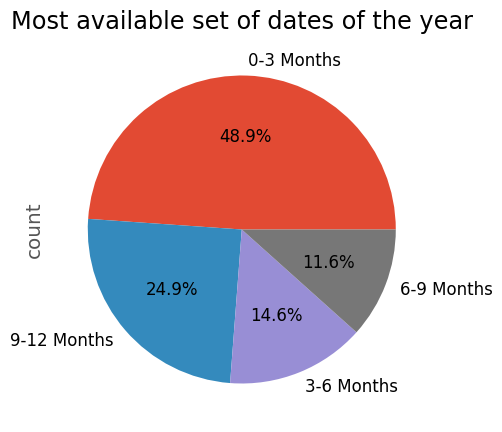

In [32]:
round(df['availability_grp'].value_counts() / df.shape[0]*100,2).plot.pie(autopct = '%1.1f%%')
plt.title("Most available set of dates of the year")
plt.savefig("../visualizations/3_most_available_set_year.png",
            bbox_inches='tight')

> review rate number

In [33]:
avg_rating_per_neighbourhood = df.groupby(['neighbourhood'])[
    'review rate number'].mean().sort_values(ascending=False)[0:24]
print(avg_rating_per_neighbourhood)

neighbourhood
Glen Oaks             4.500000
Co-op City            4.400000
Gerritsen Beach       4.333333
Huguenot              4.111111
Eltingville           4.000000
West Farms            4.000000
Todt Hill             4.000000
Silver Lake           4.000000
Woodrow               4.000000
Rosebank              3.928571
Bull's Head           3.916667
Little Neck           3.875000
Oakwood               3.857143
Clifton               3.820513
Mill Basin            3.785714
Arden Heights         3.777778
Mount Eden            3.777778
Grymes Hill           3.722222
City Island           3.707317
Randall Manor         3.704545
Unionport             3.666667
Westchester Square    3.652174
Stapleton             3.650794
South Beach           3.642857
Name: review rate number, dtype: float64


> Which neighbourhood do you give the highest ratings to?

/var/folders/8g/yph8vgw54r91qbfq45ff7lq00000gn/T/ipykernel_86554/3160337757.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_per_neighbourhood.values,


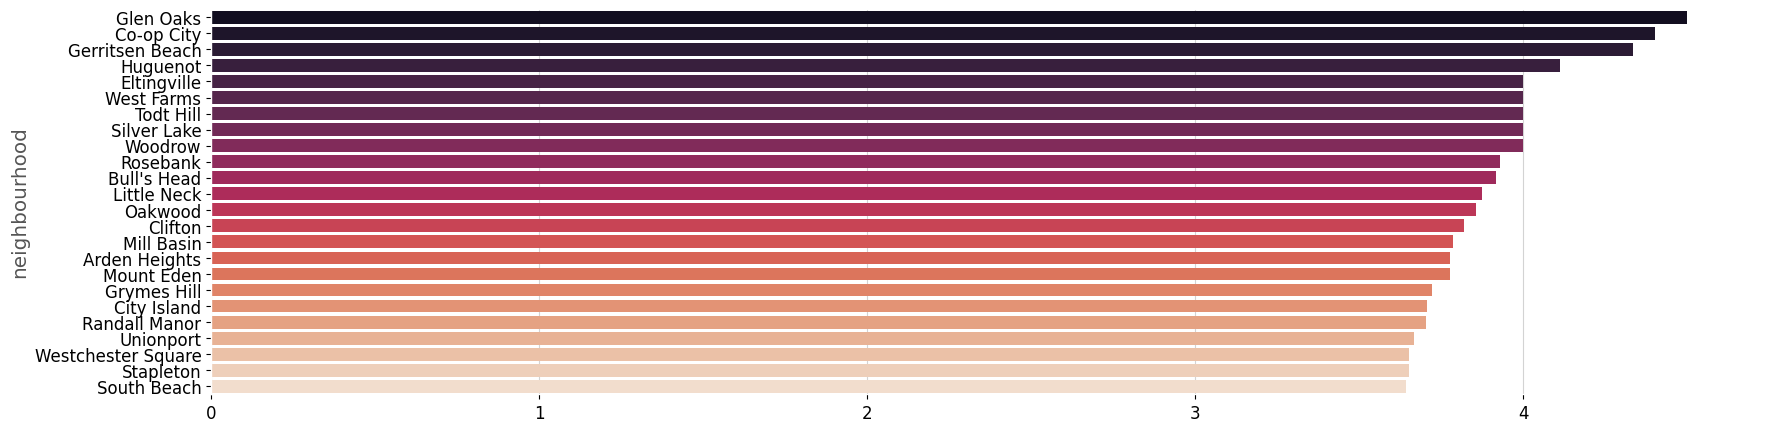

In [34]:
sns.barplot(x=avg_rating_per_neighbourhood.values,
            y=avg_rating_per_neighbourhood.index, palette='rocket')

plt.savefig("../visualizations/4_highest_rating_nbh.png",
            bbox_inches='tight')

**NOTE** 
> `Glen Oaks`

> What is the range of price?

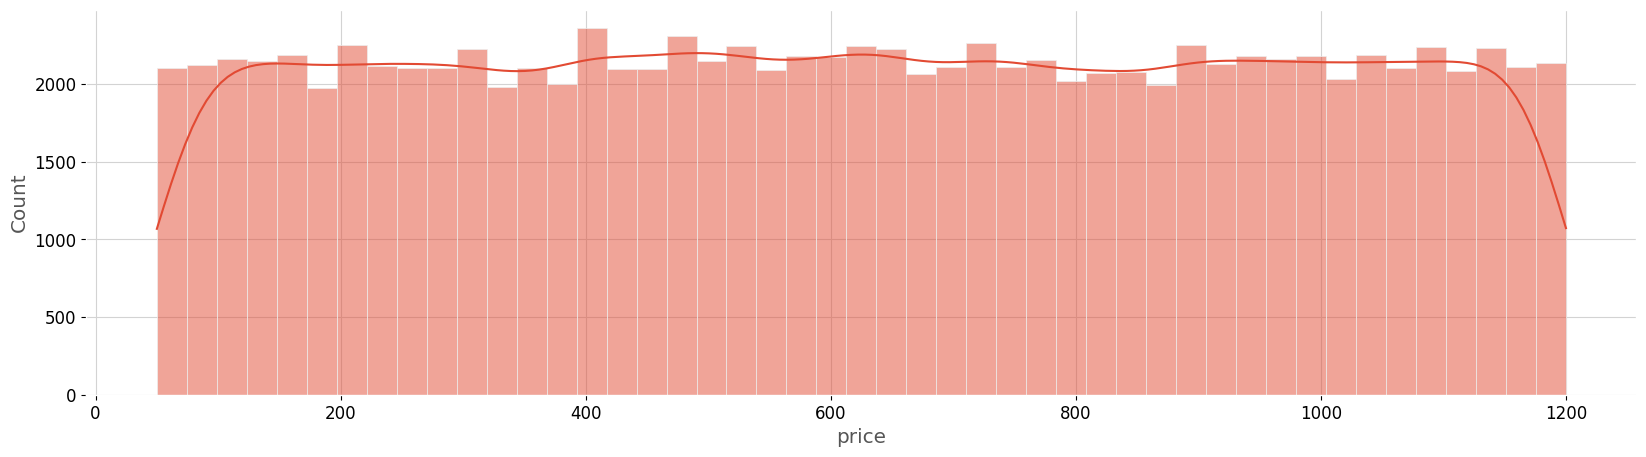

In [35]:
sns.histplot(data=df, x="price", kde=True)
plt.savefig("../visualizations/5_price_range.png",
            bbox_inches='tight')

**NOTE**
> Prices range from `50 to 1200 dollars`

> Host names

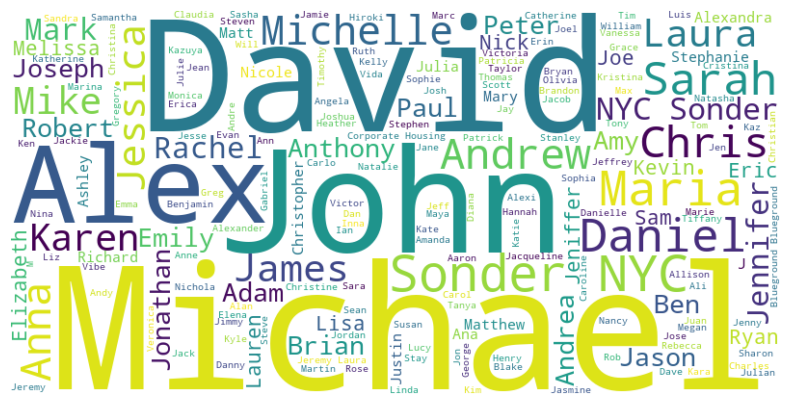

In [36]:
from wordcloud import WordCloud

host_names = df['host name'].values
wordcloud = WordCloud(background_color='white', width=800,
                      height=400).generate(' '.join(host_names))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("../visualizations/6_host_names.png",
            bbox_inches='tight')

> What are the different property types in the Dataset?

In [37]:
room_types = df['room type'].value_counts().index
room_types_counts = df['room type'].value_counts().values 

# dataframe of room types and counts
room_type_df = pd.DataFrame({'room_type': room_types, 'count': room_types_counts})
room_type_df

,room_type,count
0,Entire home/apt,52691
1,Private room,45606
2,Shared room,2182
3,Hotel room,115


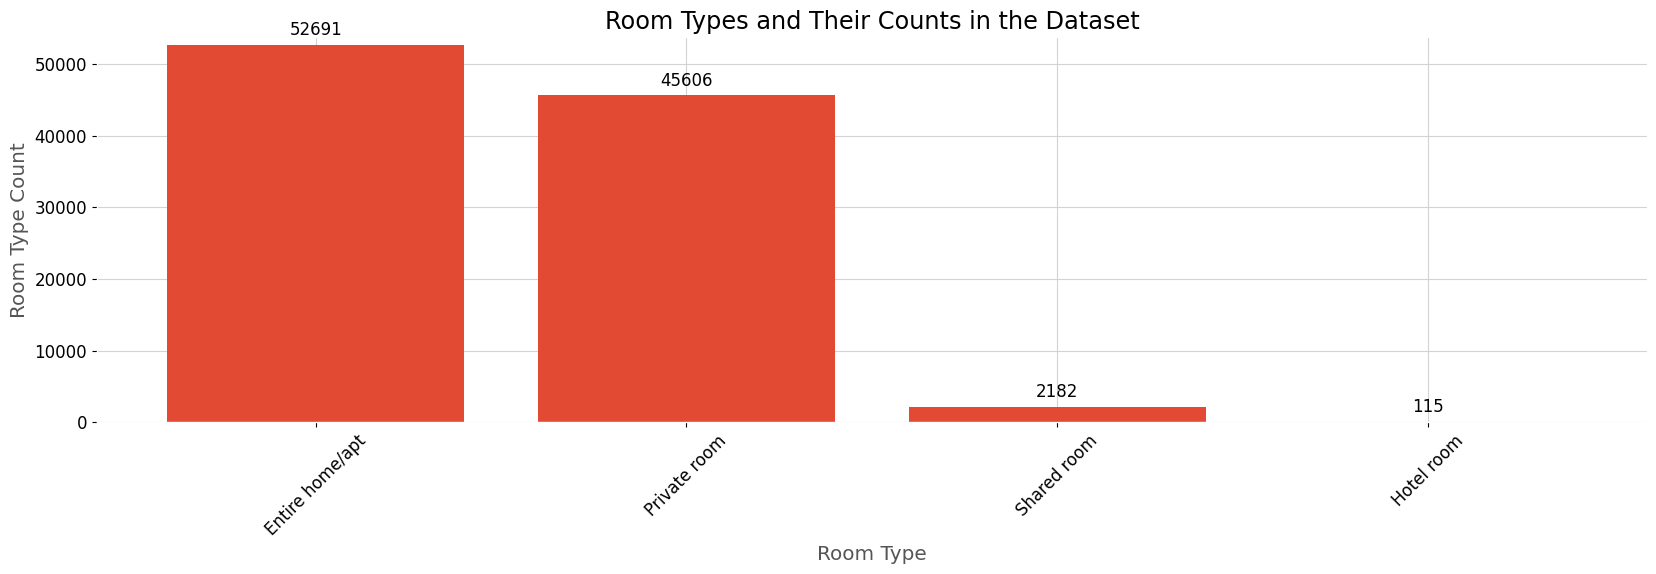

In [38]:
room_type_bar = plt.bar(room_type_df['room_type'], room_type_df['count'])

plt.bar_label(room_type_bar, labels=room_type_df['count'], padding=4)
plt.ylim([0, room_type_df['count'].max() + 1000])
plt.xlabel('Room Type')
plt.ylabel('Room Type Count')
plt.title('Room Types and Their Counts in the Dataset')
plt.xticks(rotation=45)  
plt.savefig("../visualizations/7_room_types.png", bbox_inches='tight')

**NOTE**

The Airbnb open dataset reveals four distinct property or room types. 
1. Entire home/apt
2. Private room
3. Shared room
4. Hotel room

The barchart illustrates that `Entire home/apt dominates the dataset with 44,163 occurrences`, followed by Private room with `37,494` occurrences. Shared room and Hotel room was behind with `1,646` and `108` occurrences, respectively.

> Which neighborhood group has the highest number of listings?

In [39]:
nbh_group = df['neighbourhood_group'].value_counts().to_frame()

nbh_group = df['neighbourhood_group'].value_counts().index
nbh_group_counts = df['neighbourhood_group'].value_counts().values

# dataframe of room types and counts
nbh_group_df = pd.DataFrame(
    {'neighbourhood_group': nbh_group, 'count': nbh_group_counts})

nbh_group_df

,neighbourhood_group,count
0,Manhattan,42943
1,Brooklyn,41017
2,Queens,13043
3,Bronx,2658
4,Staten Island,933


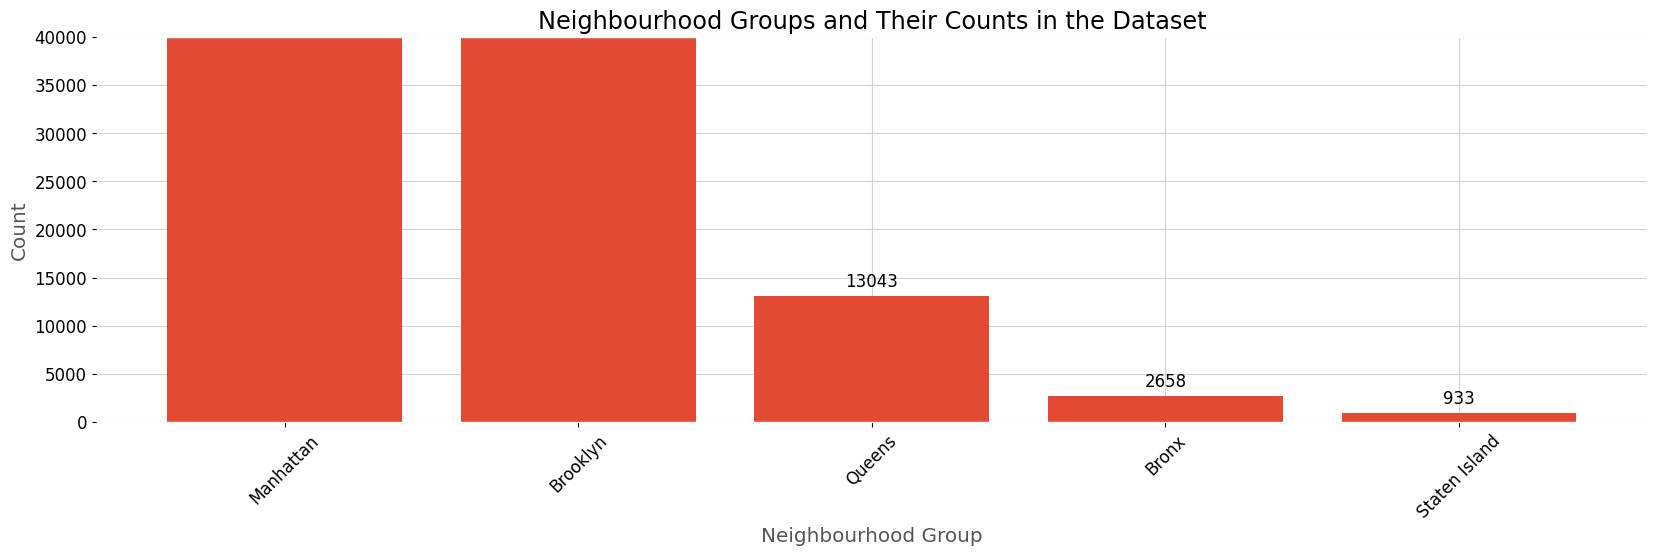

In [40]:
nbh_group_bar = plt.bar(
    nbh_group_df['neighbourhood_group'], nbh_group_df['count'])

plt.bar_label(nbh_group_bar, labels=nbh_group_df['count'], padding=4)
plt.ylim([0, 40000])
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.title('Neighbourhood Groups and Their Counts in the Dataset')
plt.xticks(rotation=45)  
plt.savefig("../visualizations/8_nbh_group_counts.png", bbox_inches='tight')

**NOTE**

The dataset contains five different neighborhood groups, namely Brooklyn, Manhattan, Queens, Bronx, and Staten Island. According to the barchart, `Brooklyn has the highest number of listings with 34636`, followed closely by Manhattan with 34566.

> Which neighborhoods group have the highest average prices for Airbnb listings?

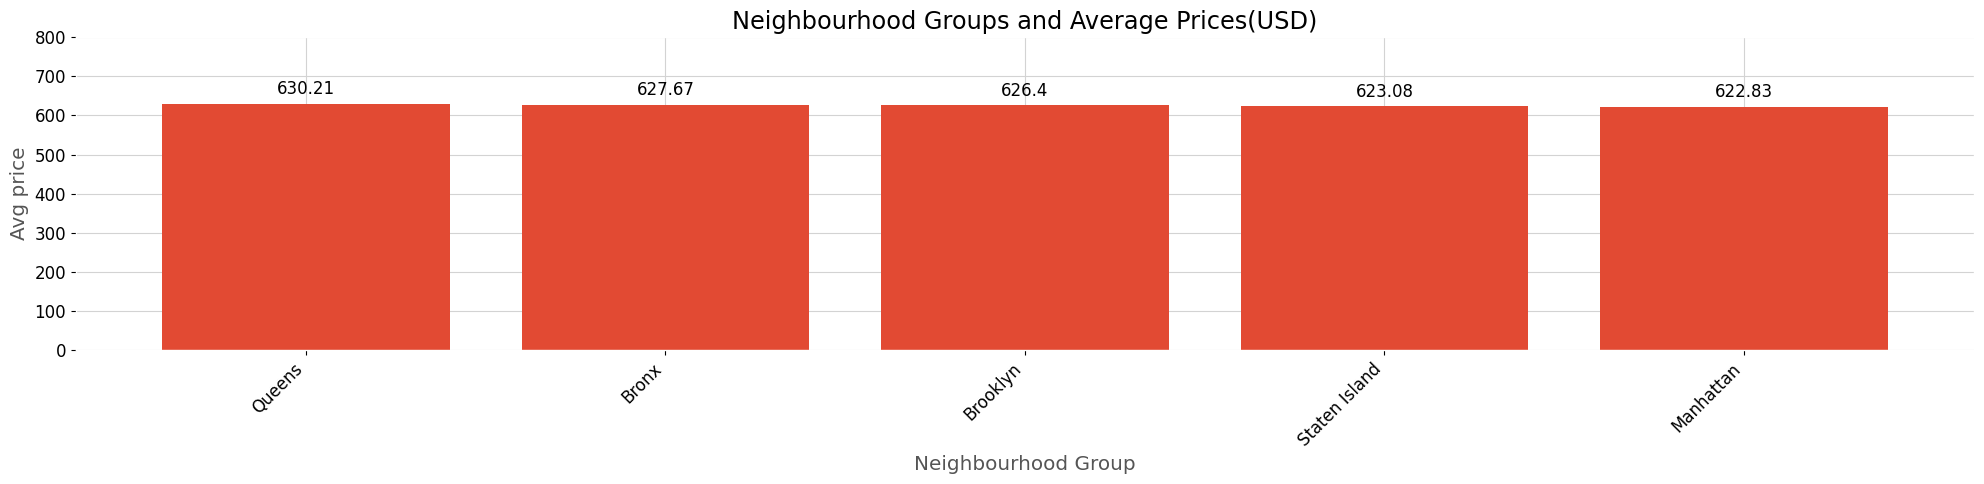

In [41]:
avg_price = (
  df.groupby('neighbourhood_group')['price']
  .mean()
  .sort_values(ascending=False)
)

avg_price_df = pd.DataFrame({
    'neighbourhood_group': avg_price.index,
    'avg_price': avg_price.values
})


avg_price_bar = plt.bar(
    avg_price_df['neighbourhood_group'], avg_price_df['avg_price'])

plt.bar_label(avg_price_bar, labels=round(avg_price_df['avg_price'], 2), padding=4)
plt.ylim([0, 800])
plt.xlabel('Neighbourhood Group')
plt.ylabel('Avg price')
plt.title('Neighbourhood Groups and Average Prices(USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("../visualizations/9_nbh_groups_avg_prices.png", bbox_inches='tight')

**NOTE**

Among the five identified neighborhood groups in the dataset, `Queens has the highest average listing price at 630.46 USD`, closely trailed by the Bronx with an average listing price of 630.20 USD. Conversely, Staten Island records the lowest average listing price at 622.13 USD.

> A relationship between the construction year of property and price.

<Figure size 1000x600 with 0 Axes>

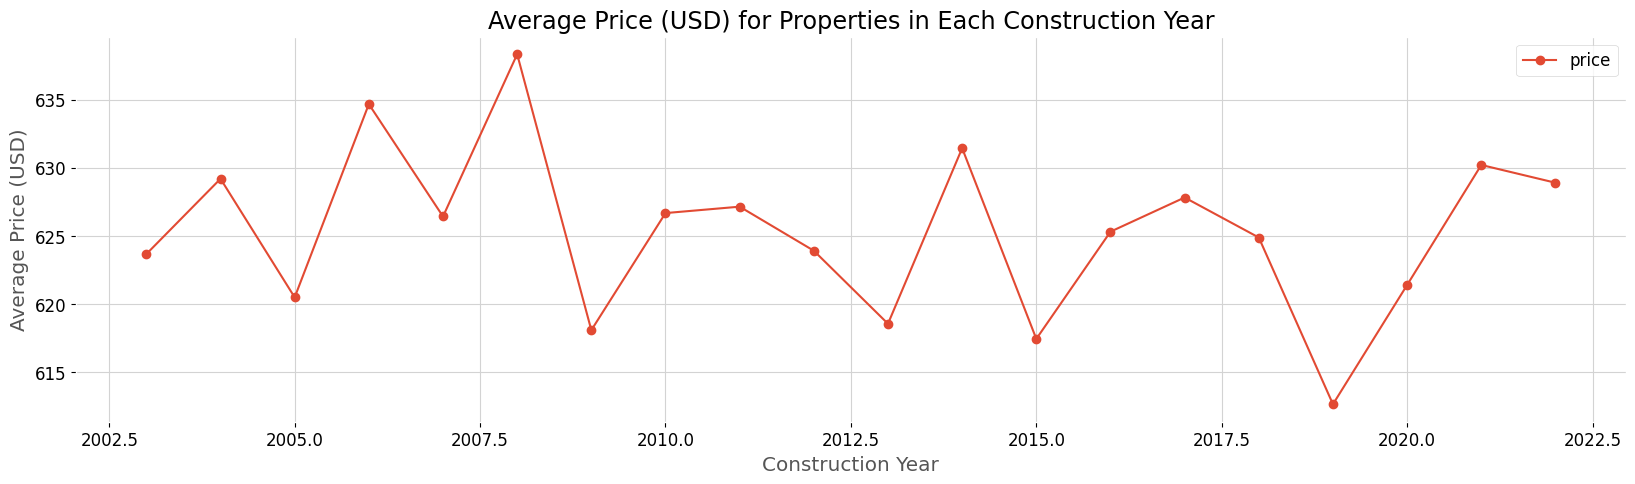

In [42]:
avg_price_by_year = (
  df.groupby(df['Construction year'])['price']
  .mean()
  .reset_index()
)

plt.figure(figsize=(10, 6))
avg_price_by_year.plot(x='Construction year', y='price', marker='o')
plt.xlabel('Construction Year')
plt.ylabel('Average Price (USD)')
plt.title('Average Price (USD) for Properties in Each Construction Year')
plt.grid(True)
plt.savefig("../visualizations/10_avg_price_constr_year.png", bbox_inches='tight')

> Who are the top 10 hosts by calculated host listing count?

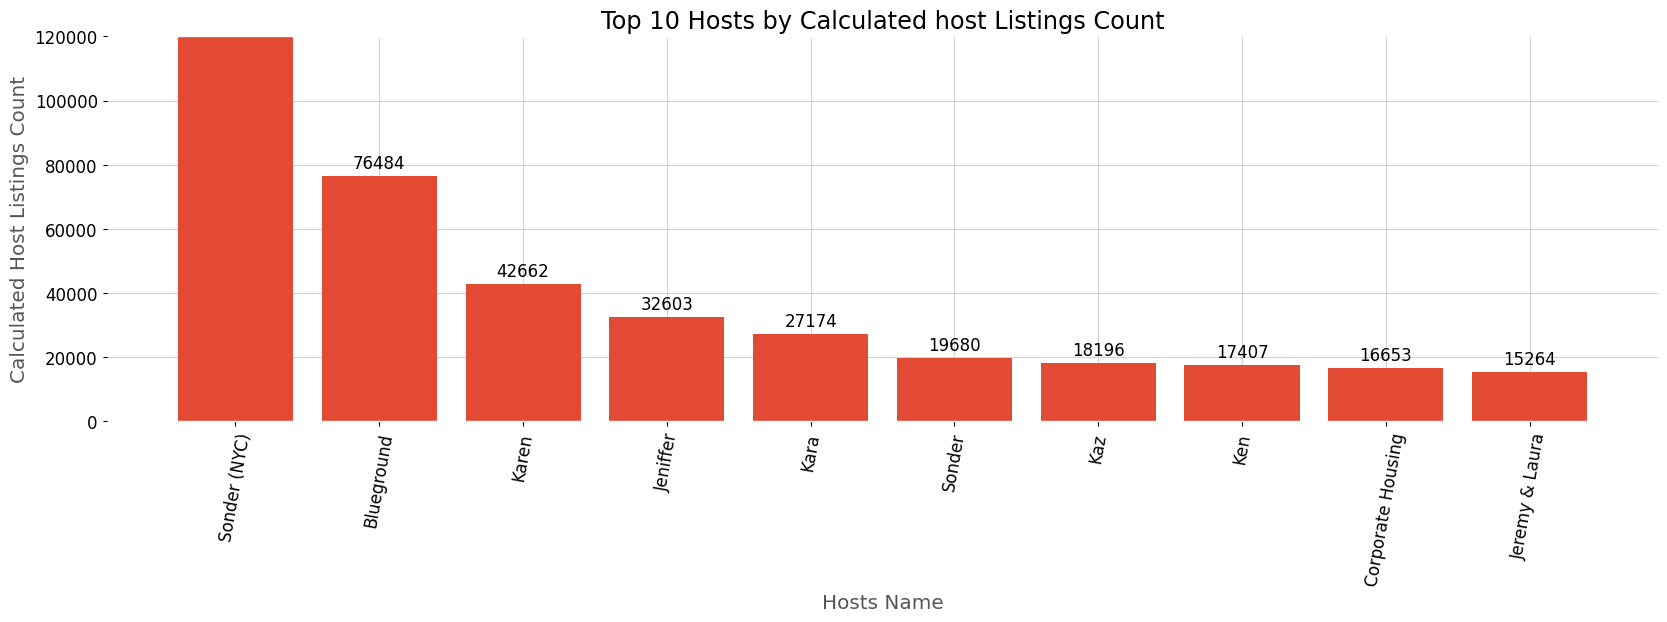

In [43]:
hosts = df.groupby('host name')['calculated host listings count'].sum(
).sort_values(ascending=False).nlargest(10).to_frame()

hosts_bar = plt.bar(
    hosts.index, hosts.loc[:, 'calculated host listings count'])
plt.bar_label(
    hosts_bar, label=hosts.loc[:, 'calculated host listings count'], label_type='edge', padding=3)

plt.xlabel('Hosts Name')
plt.ylabel('Calculated Host Listings Count')
plt.xticks(rotation=80)
plt.ylim([0, 120000])
plt.title('Top 10 Hosts by Calculated host Listings Count')
plt.savefig("../visualizations/11_top_10_hosts.png", bbox_inches='tight')

**NOTE**

* The bar chart above illustrates the top 10 hosts based on the calculated listing count, with `Sonder (NYC)`. Subsequently, the other hosts follow in descending order.


>  Are hosts with verified identities more likely to receive positive reviews?

In [44]:
review = (
  df.groupby('host_identity_verified')['review rate number']
  .mean()
  .sort_values(ascending=False)
  .to_frame()
)

review

,review rate number
host_identity_verified,
verified,3.285857
unconfirmed,3.272356


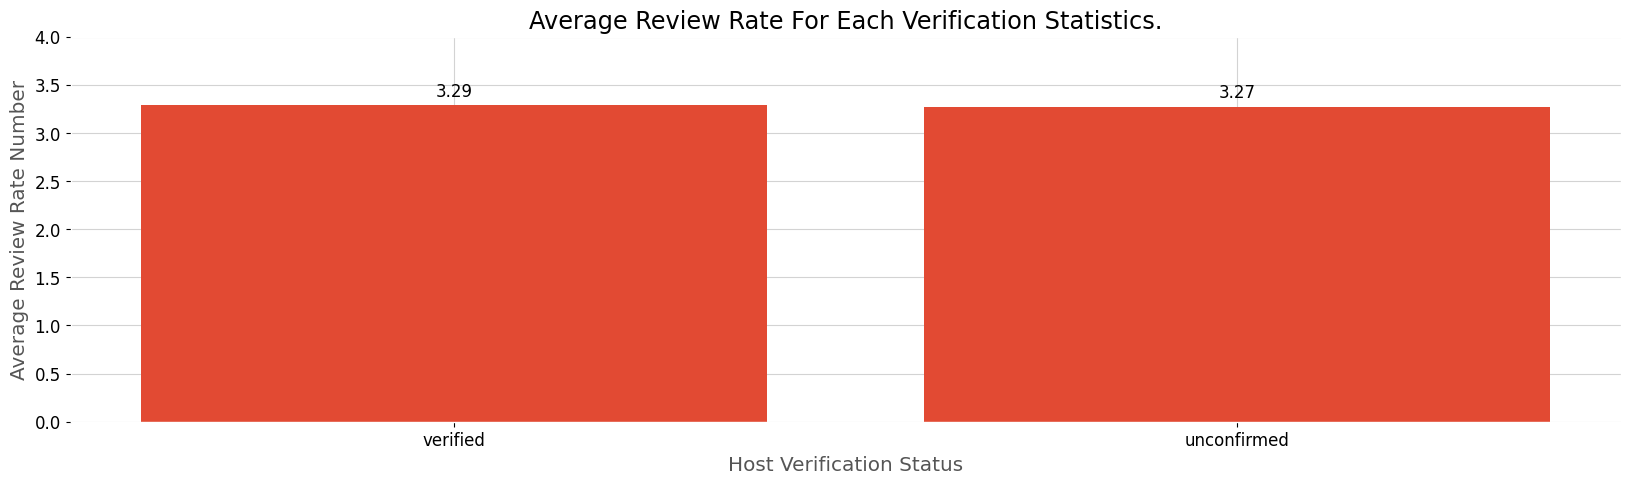

In [45]:
review_bar = plt.bar(review.index, review.loc[:, "review rate number"])

plt.bar_label(review_bar, labels=round(
    review.loc[:, "review rate number"], 2), padding=4)
plt.ylim([0, 4])
plt.xlabel('Host Verification Status')
plt.ylabel('Average Review Rate Number')
plt.title('Average Review Rate For Each Verification Statistics.')
plt.savefig("../visualizations/12_avg_review_rate_verify.png", bbox_inches='tight')

**NOTE**

`The average review rates for verified and unconfirmed hosts are 3.29 and 3.27`, respectively, indicating a marginal difference in their review rates, with unconfirmed hosts having a slightly higher rate. This suggests that verified hosts are not necessarily more likely to receive positive reviews compared to unconfirmed hosts.

> Is there a correlation between the price of a listing and its service fee?

In [46]:
df['price'].corr(df['service fee'])

0.9942128282773954

**NOTE**


`The Pearson correlation coefficient between the price and service fee is 0.99`, indicating a highly robust positive correlation between these variables. On the regression plot, each point forms a rising diagonal line towards the right, signifying that as the price of a property increases, so does its service fee.

> What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?

In [47]:
avg_rr_number = (
  df.groupby(['neighbourhood_group', 'room type'])['review rate number']
  .mean()
  .to_frame()
)

avg_rr_number

review rate number
neighbourhood_group room type                          
Bronx               Entire home/apt            3.350350
                    Private room               3.324413
                    Shared room                3.306306
Brooklyn            Entire home/apt            3.249007
                    Hotel room                 3.857143
                    Private room               3.263577
                    Shared room                3.333744
Manhattan           Entire home/apt            3.277638
                    Hotel room                 3.500000
                    Private room               3.279057
                    Shared room                3.260771
Queens              Entire home/apt            3.348883
                    Hotel room                 3.750000
                    Private room               3.312146
                    Shared room                3.370787
Staten Island       Entire home/apt            3.334764
                    Private room               3.475556
                    Shared room                3.428571

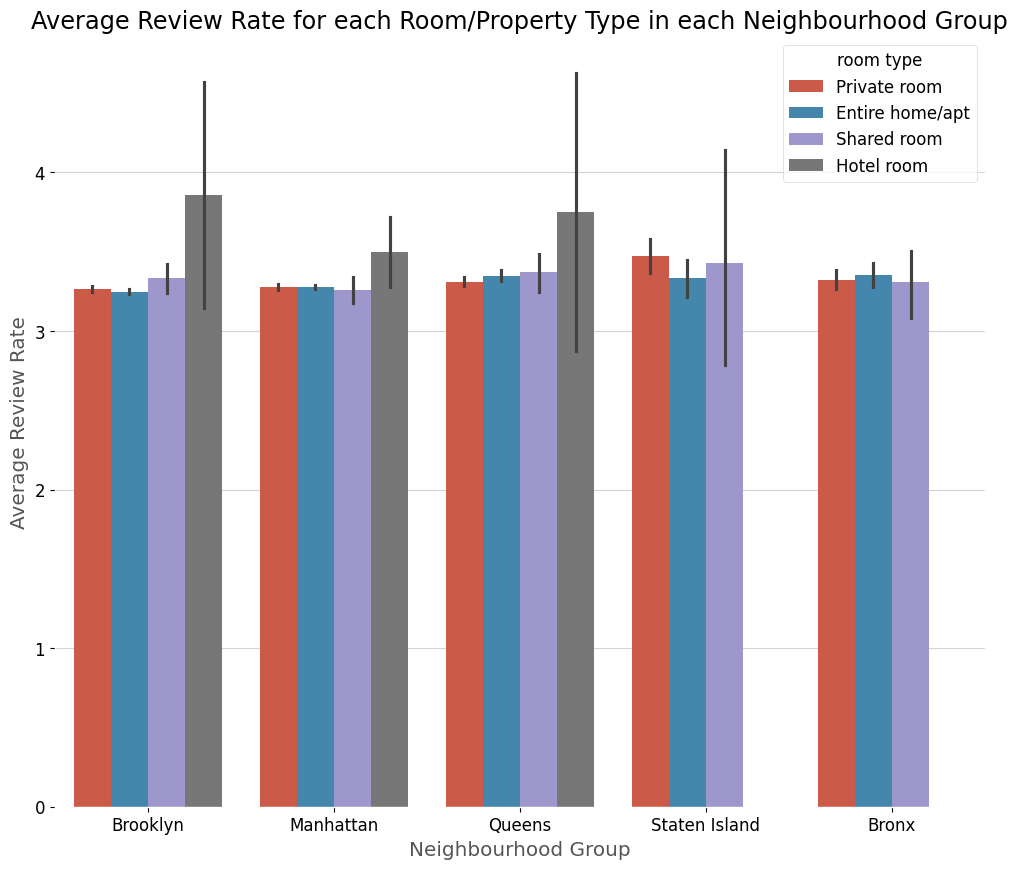

In [48]:
plt.figure(figsize=[12, 10])
sns.barplot(data=df, x='neighbourhood_group',
            y='review rate number', hue='room type')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Review Rate')
plt.title(
    'Average Review Rate for each Room/Property Type in each Neighbourhood Group')

plt.savefig("../visualizations/13_avg_rr_prope.png", bbox_inches='tight')

**NOTE**

`Hotel rooms exhibit has higher review rate` compared to all other property types within the three neighborhood groups where they are located: Brooklyn, Manhattan, and Queens.

> Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?

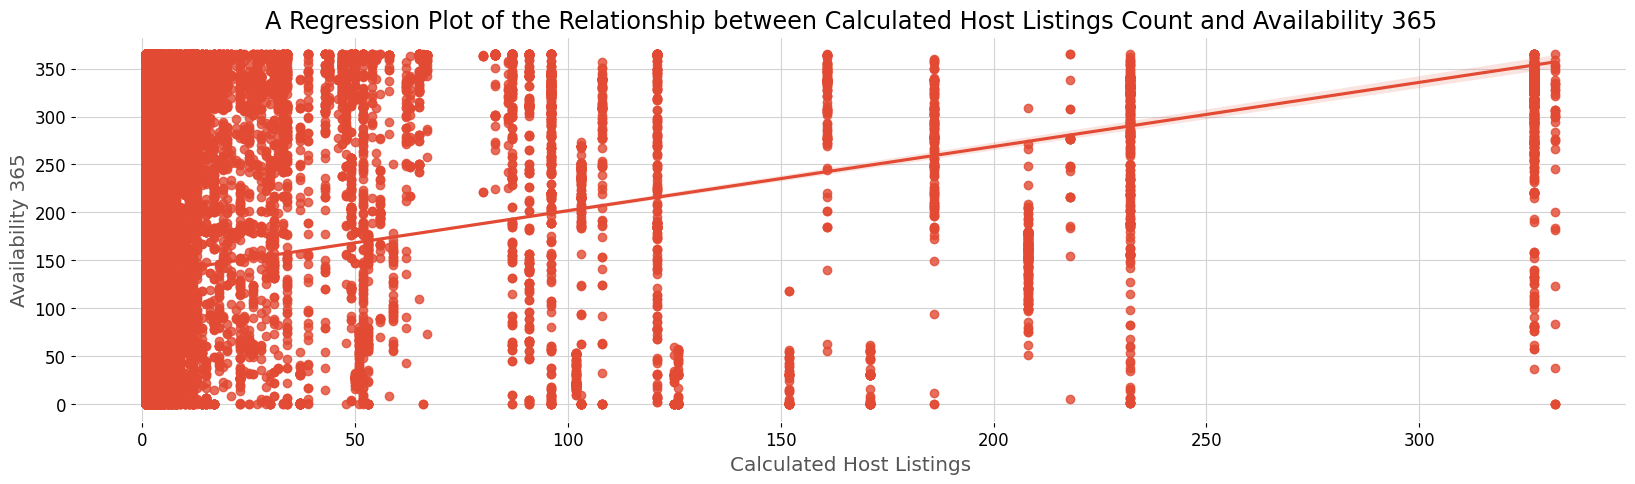

In [49]:
sns.regplot(df, x='calculated host listings count', y='availability 365')
plt.xlabel('Calculated Host Listings')
plt.ylabel('Availability 365')
plt.title('A Regression Plot of the Relationship between Calculated Host Listings Count and Availability 365')
plt.savefig("../visualizations/14_regplot_hostlist_count.png", bbox_inches='tight')

In [50]:
df['calculated host listings count'].corr(df['availability 365'])

0.16260608206477825

**NOTE**


`The Pearson correlation coefficient for the association between calculated host listings and availability 365 is 0.162`, indicating a weak positive correlation between the two variables.

/var/folders/8g/yph8vgw54r91qbfq45ff7lq00000gn/T/ipykernel_86554/1789277327.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres")


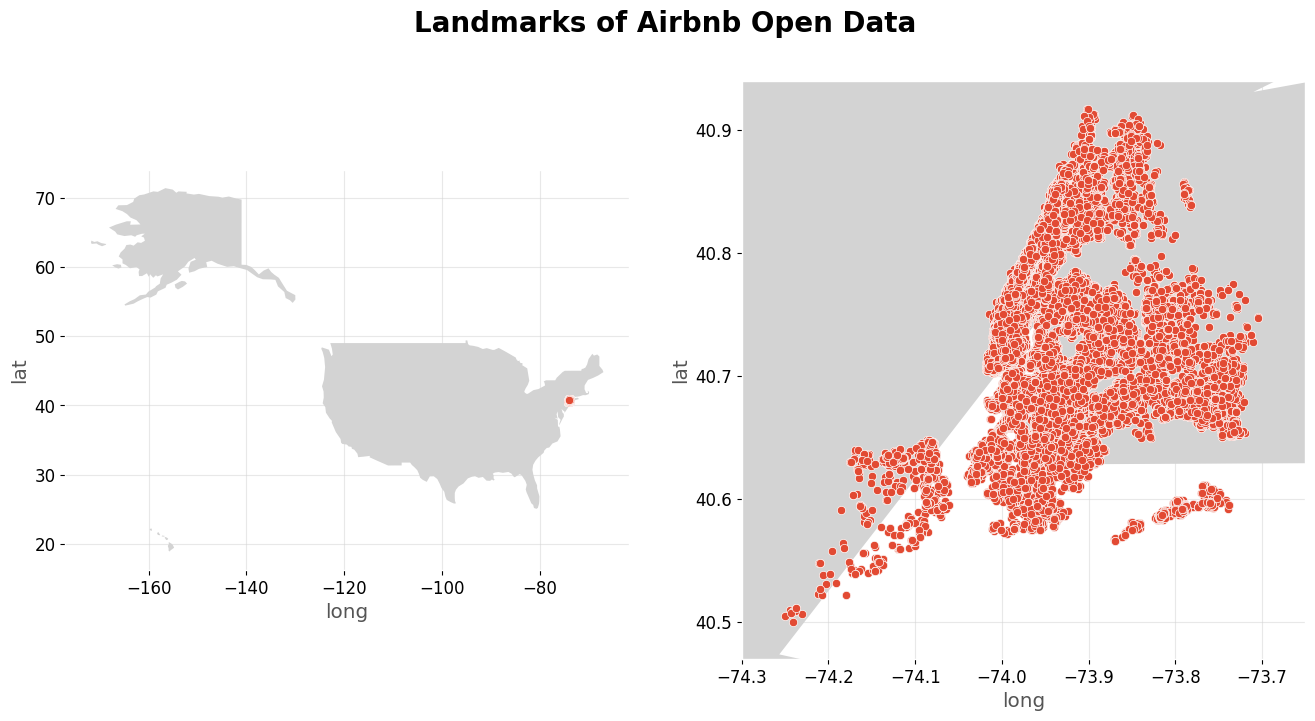

In [51]:
# visualize the land marks on the world map
import geopandas as gpd

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 16))

countries = gpd.read_file(
    gpd.datasets.get_path("naturalearth_lowres")
)

countries[countries["name"] == "United States of America"].plot(
    color="lightgrey", ax=ax[0])
countries[countries["name"] == "United States of America"].plot(
    color="lightgrey", ax=ax[1])

sns.scatterplot(x="long", y="lat", data=df, ax=ax[0])
sns.scatterplot(x="long", y="lat", data=df, ax=ax[1])
ax[0].grid(visible=True, alpha=0.5)
ax[1].grid(visible=True, alpha=0.5)
ax[1].set_xlim([-74.3, -73.65])
ax[1].set_ylim([40.47, 40.94])

plt.suptitle("Landmarks of Airbnb Open Data", x=0.5,
             y=0.72, fontweight="bold", fontsize=20)

plt.savefig("../visualizations/15_landmarks_airbnb.png",
            bbox_inches='tight')

## Encode and Split Data

In [52]:
df["reviews per month"].fillna(
    df["reviews per month"].mean(), inplace=True)
df["minimum nights"].fillna(df["minimum nights"].mean(), inplace=True)
df["availability 365"].fillna(
    df["availability 365"].mean(), inplace=True)
df["calculated host listings count"].fillna(
    df["calculated host listings count"].mean(), inplace=True)
df["number of reviews"].fillna(
    df["number of reviews"].median(), inplace=True)
df["review rate number"].fillna(
    df["review rate number"].median(), inplace=True)

In [53]:
# fills null date
num_days = 10
g = df['last review'].notna().cumsum()
days = pd.to_timedelta(df.groupby(g).cumcount().mul(num_days), unit='d')
df['last review'] = df['last review'].ffill().add(days)

In [54]:
df.isnull().sum().sort_values()

id                                    0
availability 365                      0
calculated host listings count        0
review rate number                    0
reviews per month                     0
last review                           0
number of reviews                     0
minimum nights                        0
service fee                           0
price                                 0
Construction year                     0
room type                             0
cancellation_policy                   0
instant_bookable                      0
long                                  0
lat                                   0
neighbourhood                         0
neighbourhood_group                   0
host name                             0
host_identity_verified                0
host id                               0
NAME                                  0
availability_grp                      0
house_rules                       51235
dtype: int64

In [55]:
df.drop(columns=['house_rules'], inplace=True)

In [56]:
df.isnull().sum().sort_values()

id                                0
calculated host listings count    0
review rate number                0
reviews per month                 0
last review                       0
number of reviews                 0
minimum nights                    0
service fee                       0
price                             0
Construction year                 0
availability 365                  0
room type                         0
instant_bookable                  0
long                              0
lat                               0
neighbourhood                     0
neighbourhood_group               0
host name                         0
host_identity_verified            0
host id                           0
NAME                              0
cancellation_policy               0
availability_grp                  0
dtype: int64

**Encoding**

In [57]:
df['host_identity_verified'].value_counts()

host_identity_verified
unconfirmed    50352
verified       50242
Name: count, dtype: int64

In [58]:
import pickle

# Serialize and save the DataFrame to a file using pickle.dump
with open("final_data.pkl", "wb") as f:
    pickle.dump(df, f)

In [59]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
host_identity_verified_le = LabelEncoder()

df['host_identity_verified'] = host_identity_verified_le.fit_transform(
    df['host_identity_verified'])

In [60]:
df['host_identity_verified'].value_counts()
# unconfirmed = 0 , verified = 1

host_identity_verified
0    50352
1    50242
Name: count, dtype: int64

In [61]:
df['instant_bookable'].value_counts()

le = LabelEncoder()
instant_bookable_le = LabelEncoder()

df['instant_bookable'] = instant_bookable_le.fit_transform(
    df['instant_bookable'])
df['instant_bookable'].value_counts()

# False = 0 , True = 1

instant_bookable
0    50508
1    50086
Name: count, dtype: int64

In [62]:
df.select_dtypes('object')

,NAME,host name,neighbourhood_group,neighbourhood,cancellation_policy,room type,availability_grp
0,Clean & quiet apt home by the park,Madaline,Brooklyn,Kensington,strict,Private room,9-12 Months
1,Skylit Midtown Castle,Jenna,Manhattan,Midtown,moderate,Entire home/apt,6-9 Months
4,Entire Apt: Spacious Studio/Loft by central park,Lyndon,Manhattan,East Harlem,moderate,Entire home/apt,9-12 Months
5,Large Cozy 1 BR Apartment In Midtown East,Michelle,Manhattan,Murray Hill,flexible,Entire home/apt,9-12 Months
7,BlissArtsSpace!,Emma,Brooklyn,Bedford-Stuyvesant,moderate,Private room,6-9 Months
...,...,...,...,...,...,...,...
102037,Bx Apartment,Vii,Bronx,Olinville,strict,Private room,0-3 Months
102038,HUGE BEDROOM LORIMER L TRAIN!!!,Jose,Brooklyn,Williamsburg,flexible,Private room,6-9 Months
102039,Spacious two bedrooms condo in upper Manhattan,Max,Manhattan,Inwood,moderate,Entire home/apt,3-6 Months
102040,"Room in Queens, NY, near LGA.",Sonia,Queens,East Elmhurst,strict,Private room,9-12 Months


In [63]:
df['cancellation_policy'].value_counts()

le = LabelEncoder()
cancellation_policy_le = LabelEncoder()

df['cancellation_policy'] = cancellation_policy_le.fit_transform(
    df['cancellation_policy'])
df['cancellation_policy'].value_counts()

# moderate = 1 , strict = 2 , flexible = 0

cancellation_policy
1    33708
2    33478
0    33408
Name: count, dtype: int64

In [64]:
df['room type'].value_counts()

le = LabelEncoder()
room_type_le = LabelEncoder()

df['room type'] = room_type_le.fit_transform(df['room type'])
df['room type'].value_counts()
# Hotel room = 1 , Private room = 2 , Entire home/apt = 0 , Shared room = 3

room type
0    52691
2    45606
3     2182
1      115
Name: count, dtype: int64

In [65]:
df['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        42943
Brooklyn         41017
Queens           13043
Bronx             2658
Staten Island      933
Name: count, dtype: int64

In [66]:

le = LabelEncoder()
neighbourhood_group_le = LabelEncoder()

df['neighbourhood_group'] = neighbourhood_group_le.fit_transform(
    df['neighbourhood_group'])

df['neighbourhood_group'].value_counts()
# Brooklyn = 1 , Manhattan = 2 , Bronx = 0 , Queens = 3 , Staten Island = 4

neighbourhood_group
2    42943
1    41017
3    13043
0     2658
4      933
Name: count, dtype: int64

In [67]:
df.select_dtypes('object')

,NAME,host name,neighbourhood,availability_grp
0,Clean & quiet apt home by the park,Madaline,Kensington,9-12 Months
1,Skylit Midtown Castle,Jenna,Midtown,6-9 Months
4,Entire Apt: Spacious Studio/Loft by central park,Lyndon,East Harlem,9-12 Months
5,Large Cozy 1 BR Apartment In Midtown East,Michelle,Murray Hill,9-12 Months
7,BlissArtsSpace!,Emma,Bedford-Stuyvesant,6-9 Months
...,...,...,...,...
102037,Bx Apartment,Vii,Olinville,0-3 Months
102038,HUGE BEDROOM LORIMER L TRAIN!!!,Jose,Williamsburg,6-9 Months
102039,Spacious two bedrooms condo in upper Manhattan,Max,Inwood,3-6 Months
102040,"Room in Queens, NY, near LGA.",Sonia,East Elmhurst,9-12 Months


In [68]:
df.shape

(100594, 23)

## Split Data

In [69]:
split_data = df.copy()

In [70]:
split_data.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long',
       'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'availability_grp'],
      dtype='object')

In [71]:
split_data = split_data[['host_identity_verified', 'neighbourhood_group', 'instant_bookable', 'cancellation_policy', 'room type', 'Construction year', 'minimum nights', 'number of reviews', 'reviews per month',
                         'review rate number', 'calculated host listings count',
       'availability 365', 'price', 'service fee']]

In [72]:
def detect_numerical(df):
    numerical_columns = df.select_dtypes(include=['number']).columns
    numerical_info = {}

    for col in numerical_columns:
        min_val = df[col].min()
        max_val = df[col].max()
        numerical_info[col] = {'min': min_val, 'max': max_val}

    return numerical_info


detect_numerical(df)

{'id': {'min': 1001254, 'max': 57367417},
 'host id': {'min': 123600518, 'max': 98763129024},
 'host_identity_verified': {'min': 0, 'max': 1},
 'neighbourhood_group': {'min': 0, 'max': 4},
 'lat': {'min': 40.49979, 'max': 40.91697},
 'long': {'min': -74.24984, 'max': -73.70522},
 'instant_bookable': {'min': 0, 'max': 1},
 'cancellation_policy': {'min': 0, 'max': 2},
 'room type': {'min': 0, 'max': 3},
 'Construction year': {'min': 2003.0, 'max': 2022.0},
 'price': {'min': 50.0, 'max': 1200.0},
 'service fee': {'min': 0.0, 'max': 240.0},
 'minimum nights': {'min': 1.0, 'max': 5645.0},
 'number of reviews': {'min': 0.0, 'max': 1024.0},
 'reviews per month': {'min': 0.01, 'max': 90.0},
 'review rate number': {'min': 1.0, 'max': 5.0},
 'calculated host listings count': {'min': 1.0, 'max': 332.0},
 'availability 365': {'min': 0.0, 'max': 365.0}}

In [73]:
split_data.head()

,host_identity_verified,neighbourhood_group,instant_bookable,cancellation_policy,room type,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365,price,service fee
0,0,1,0,2,2,2020.0,10.0,9.0,0.21,4.0,6.0,286.0,966.0,193.0
1,1,2,0,1,0,2007.0,30.0,45.0,0.38,4.0,2.0,228.0,142.0,28.0
4,1,2,0,1,0,2009.0,10.0,9.0,0.10,3.0,1.0,289.0,204.0,41.0
5,1,2,1,0,0,2013.0,3.0,74.0,0.59,3.0,1.0,365.0,577.0,115.0
7,0,1,0,1,2,2009.0,45.0,49.0,0.40,5.0,1.0,219.0,1060.0,212.0


In [74]:
split_data.columns

Index(['host_identity_verified', 'neighbourhood_group', 'instant_bookable',
       'cancellation_policy', 'room type', 'Construction year',
       'minimum nights', 'number of reviews', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'price', 'service fee'],
      dtype='object')

In [75]:
# Change column names final
split_data.columns = ['host_identity_verified', 'neighbourhood_group', 'instant_bookable',
                      'cancellation_policy', 'room_type', 'construction_year',
                      'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                      'review_rate_number', 'calculated_host_listings_count',
                      'availability_365', 'price', 'service_fee']

In [76]:
split_data.columns

Index(['host_identity_verified', 'neighbourhood_group', 'instant_bookable',
       'cancellation_policy', 'room_type', 'construction_year',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'price', 'service_fee'],
      dtype='object')

In [77]:


# Serialize and save the DataFrame to a file using pickle.dump
with open("split_data.pkl", "wb") as f:
    pickle.dump(split_data, f)